<a href="https://colab.research.google.com/github/Foulach/project_an/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Essayons d'améliorer les résultats avec Random Forest qui offre un meilleur compromis bias-variance que la régression linéaire.


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/happiness_project/regressions/merged_df.csv')
df.head()

Mounted at /content/drive


,year,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,id,average monthly earnings,population_density,unemployment rate,weekly hours worked,maternity leave duration
0,2015,switzerland,western europe,7.587,84231.63,1.34951,0.94143,0.66557,0.29678,0.41978,switzerland_2015,5966.104,209.668880,4.801,36.22,0.0
1,2015,iceland,western europe,7.561,53227.63,1.40223,0.94784,0.62877,0.43630,0.14145,iceland_2015,4692.284,3.282376,3.979,38.92,0.0
2,2015,denmark,western europe,7.527,53478.50,1.36058,0.87464,0.64938,0.34139,0.48357,denmark_2015,4931.349,142.092450,6.278,32.67,0.0
3,2015,norway,western europe,7.522,74568.14,1.33095,0.88521,0.66973,0.34699,0.36503,norway_2015,5282.629,14.247059,4.296,34.3,91.0
4,2015,canada,north america and anz,7.427,43628.43,1.32261,0.90563,0.63297,0.45811,0.32957,canada_2015,3212.450,4.091872,6.945,35.55,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Encodage One-Hot de la colonne 'region'
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

In [ ]:
# convert bool to numeric data
# Convert boolean columns to numeric (assuming you have boolean columns)
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       1152 non-null   int64  
 1   country                                    1152 non-null   object 
 2   happiness_score                            1152 non-null   float64
 3   gdp_per_capita                             1152 non-null   float64
 4   social_support                             1152 non-null   float64
 5   healthy_life_expectancy                    1152 non-null   float64
 6   freedom_to_make_life_choices               1152 non-null   float64
 7   generosity                                 1152 non-null   float64
 8   perceptions_of_corruption                  1152 non-null   float64
 9   id                                         1152 non-null   object 
 10  average monthly earnings

In [ ]:
# Liste des colonnes à inclure dans les features (X) après l'encodage
features_to_include = [
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption',
    'population_density'
]

# Ajout des colonnes encodées de la région aux features
region_columns = [col for col in df_encoded.columns if 'region_' in col]
features_to_include.extend(region_columns)

# Sélection des features (X)
X = df_encoded[features_to_include]

# Variable cible (y)
y = df_encoded['happiness_score']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# prompt: run random forest, evaluate the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)


Mean Squared Error: 0.11589292023075956
Root Mean Squared Error: 0.34043049251023266
R-squared: 0.8929708289915762


In [ ]:
# prompt: check the importance of the features

# Get feature importances
importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': features_to_include,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print or display the feature importances
print(feature_importances_df)


                                      Feature  Importance
0                              gdp_per_capita    0.710790
14                  region_sub-saharan africa    0.041891
3                freedom_to_make_life_choices    0.041170
6                          population_density    0.040680
9          region_latin america and caribbean    0.036249
1                              social_support    0.034362
4                                  generosity    0.023945
5                   perceptions_of_corruption    0.022874
2                     healthy_life_expectancy    0.020139
8                            region_east asia    0.014718
7   region_commonwealth of independent states    0.005325
12                          region_south asia    0.003023
13                      region_southeast asia    0.001939
15                      region_western europe    0.001533
10        region_middle east and north africa    0.000871
11               region_north america and anz    0.000490


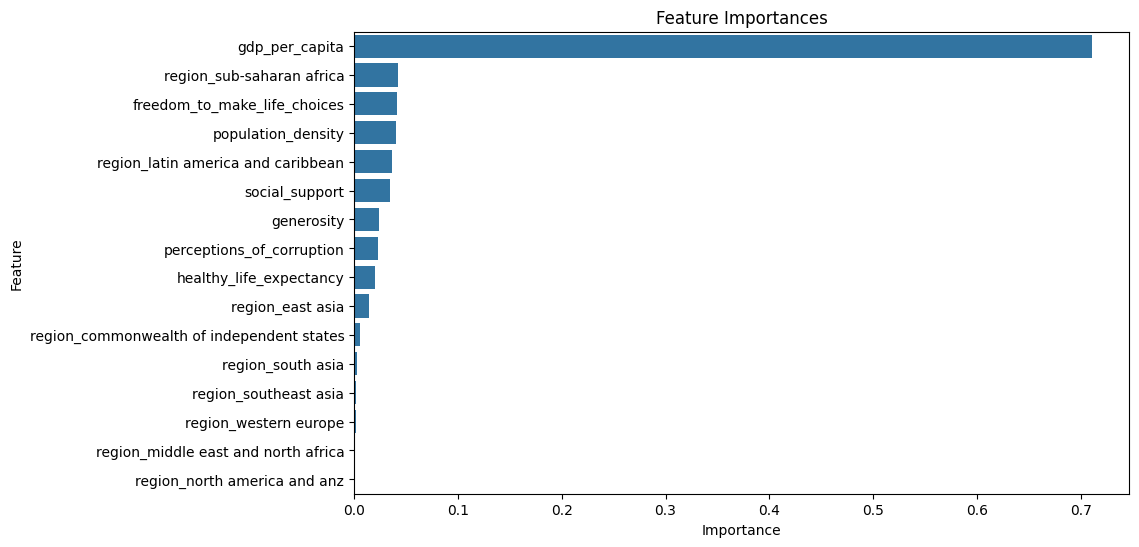

In [ ]:
# prompt: # Visualiser l'importance des variables

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()


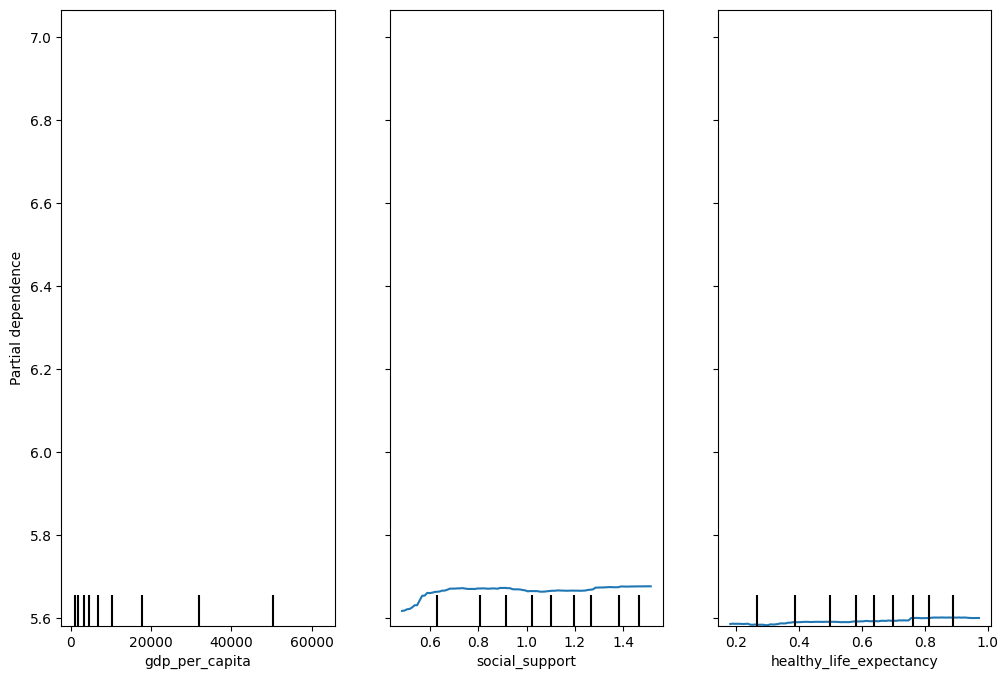

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Sélectionner les features pour lesquelles vous voulez créer des graphiques de dépendance partielle
features_to_plot = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy']

# Créer les graphiques de dépendance partielle
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(rf_model, X, features_to_plot, ax=ax)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.1 MB/s eta 0:00:00


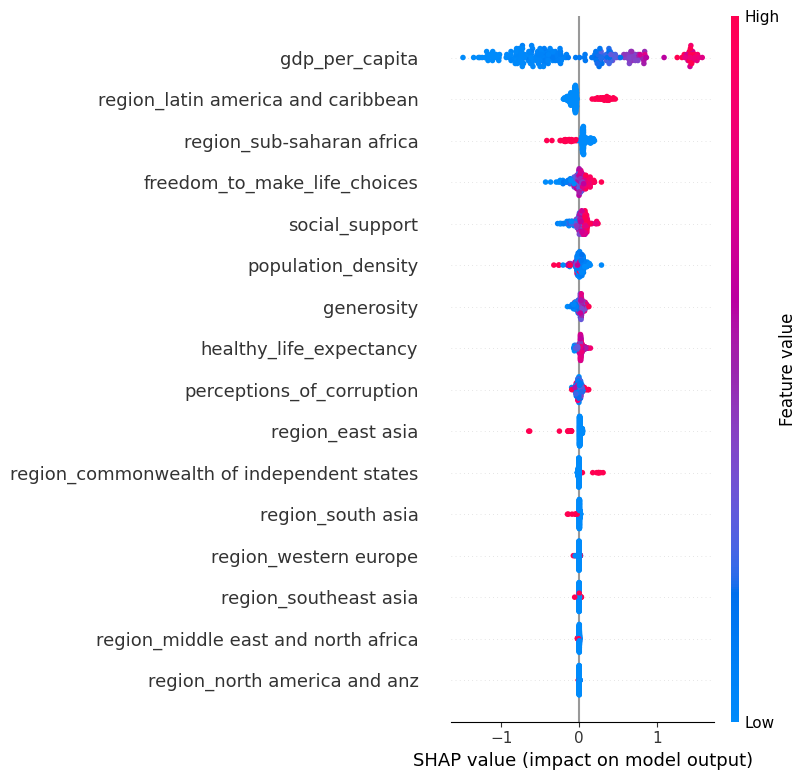

In [ ]:
# prompt: affiche SHAP values

!pip install shap
import shap

# Créer un explainer SHAP
explainer = shap.TreeExplainer(rf_regressor)

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer.shap_values(X_test)

# Afficher le summary plot
shap.summary_plot(shap_values, X_test, feature_names=features_to_include)
